In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [137]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

* Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

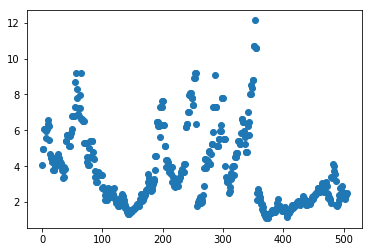

In [139]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

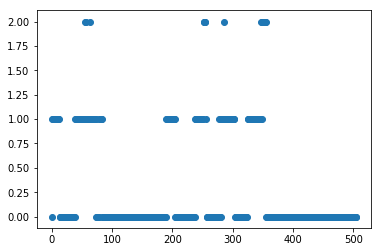

In [140]:
# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
# NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın    
new_DIS, bins = pd.cut(df.DIS, bins=3, retbins=True, labels=[0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS);

* <b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
  -- Equal-frequency(Eşit frekans)<br>
  -- Equal-width (eşit aralıklar)

  IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [141]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Equal-width


### Soru 

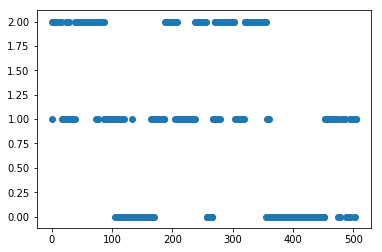

In [142]:
# aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.qcut(df.DIS, q=3, retbins=True, labels=[0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS);

* <b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
  -- Equal-frequency(Eşit frekans)<br>
  -- Equal-width (eşit aralıklar)

  IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [143]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Equal-frequency


# Feature Generation

* Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [115]:
df["NEW_SUM"] = df["NOX"] + df["RM"]

In [116]:
df["NEW_MINUS"] = df["NOX"] - df["RM"]

In [117]:
df["NEW_DIVISION"] = df["NOX"] / df["RM"]

In [118]:
df["NEW_MULTIPLICATION"]  = df["NOX"] * df["RM"]

In [119]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,NEW_SUM,NEW_MINUS,NEW_DIVISION,NEW_MULTIPLICATION
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,7.113,-6.037,0.081825,3.537350
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,6.890,-5.952,0.073042,3.011449
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.654,-6.716,0.065275,3.369765
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,7.456,-6.540,0.065447,3.205084
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,7.605,-6.689,0.064083,3.273326


* sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [120]:
dff = df.drop("PRICE", axis=1)
dff.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,NEW_SUM,NEW_MINUS,NEW_DIVISION,NEW_MULTIPLICATION
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,7.113,-6.037,0.081825,3.537350
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,6.890,-5.952,0.073042,3.011449
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.654,-6.716,0.065275,3.369765
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,7.456,-6.540,0.065447,3.205084
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,7.605,-6.689,0.064083,3.273326


In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, interaction_only=False)
pd.DataFrame(poly.fit_transform(dff))

,0,1,2,3,4,5,6,7,8,9,...,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,-220.020693,2.982146,128.920026,-0.040420,-1.747373,-75.540045,0.000548,0.023684,1.023865,44.262312
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,-210.857361,2.587593,106.684508,-0.031754,-1.309208,-53.977647,0.000390,0.016066,0.662401,27.310304
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,-302.922870,2.944201,151.992091,-0.028616,-1.477258,-76.262303,0.000278,0.014358,0.741217,38.264747
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,-279.726264,2.799284,137.086571,-0.028013,-1.371857,-67.182565,0.000280,0.013728,0.672311,32.924429
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,-299.284061,2.867240,146.457512,-0.027469,-1.403111,-71.670381,0.000263,0.013442,0.686626,35.072585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,-218.167208,3.149666,136.908584,-0.045472,-1.976541,-85.915572,0.000656,0.028535,1.240358,53.915432
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,-170.676802,2.880843,107.900231,-0.048626,-1.821241,-68.213488,0.000821,0.030741,1.151371,43.123910
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,-262.512813,3.367559,163.880808,-0.043200,-2.102291,-102.307080,0.000554,0.026969,1.312412,63.867995
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,-240.757932,3.263995,150.660903,-0.044251,-2.042535,-94.280208,0.000600,0.027691,1.278172,58.998435


# Normalizasyon

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

* sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [123]:
df.drop(["NEW_SUM","NEW_MINUS","NEW_DIVISION","NEW_MULTIPLICATION"], axis = 1,inplace = True)

In [124]:
mm = MinMaxScaler()
df_mm = mm.fit_transform(df)
pd.DataFrame(df_mm).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111


* sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [125]:
std = StandardScaler()
df_std = std.fit_transform(df)
pd.DataFrame(df_std).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758


* sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [126]:
robust = RobustScaler()
df_robust = robust.fit_transform(df)
pd.DataFrame(df_robust).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781


# Correlation & Covariance

* Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
  Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


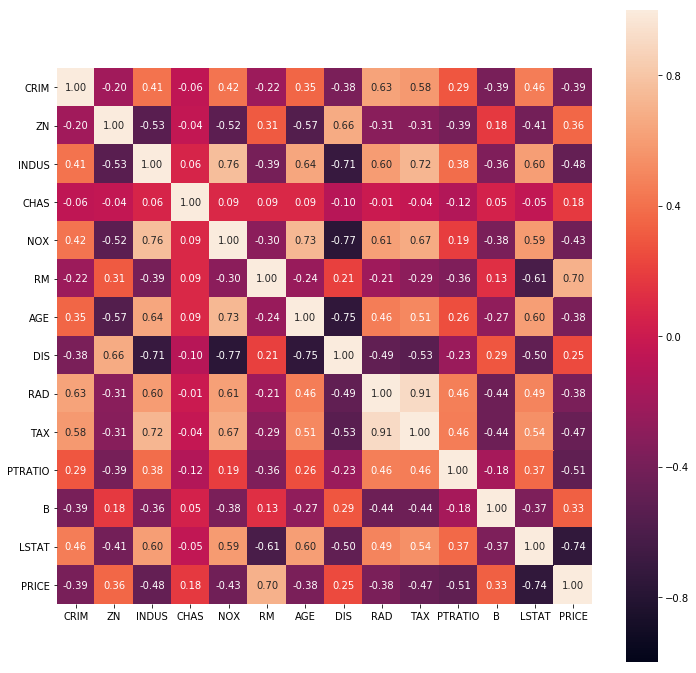

In [127]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

* Aşağıda örnek iki değişken için scatter plot çizilmiştir.

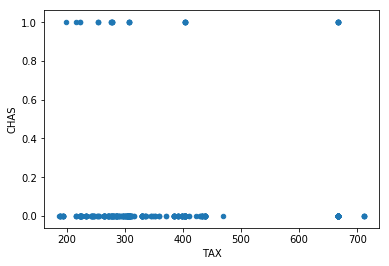

In [128]:
df.plot.scatter("TAX","CHAS");
# scatter plot çizerken buradan kopya çekebilirsiniz :)

* Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

TAX ve RAD değişkenleri %91 oranında pozitif korelasyona sahiptirler.TAX değişkeni emlak vergi oranlarını bulunduran, RAD değişkeni ise otoyollara erişim indexini bulunduran değişkendir.Bu duruma göre emlak vergi oranı arttıkça otoyollara erişim kolaylaşıyor diyebiliriz. Bu evler pahalı :)


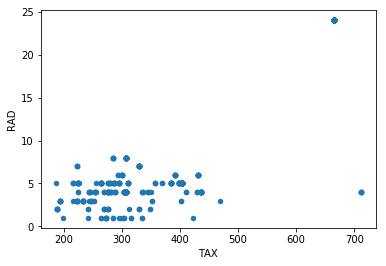

In [129]:
df.plot.scatter("TAX","RAD");

print("TAX ve RAD değişkenleri %91 oranında pozitif korelasyona sahiptirler."+
      "TAX değişkeni emlak vergi oranlarını bulunduran, RAD değişkeni ise otoyollara erişim indexini bulunduran değişkendir."+
      "Bu duruma göre emlak vergi oranı arttıkça otoyollara erişim kolaylaşıyor diyebiliriz. Bu evler pahalı :)")

* Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

DIS ve NOX değişkenleri %77 oranında negatif korelasyona sahiptirler.DIS değişkeni evin Boston merkeze olan uzaklığını, NOX değişkeni ise nitrik oksit konsantrasyonunu bulunduran değişkendir.Bu duruma göre eğer ev Boston merkeze yakınsa nitrik oksit konsantrasyonu artmaktadır diyebiliriz. Evinizi biraz uzakta tutmalısınız :)


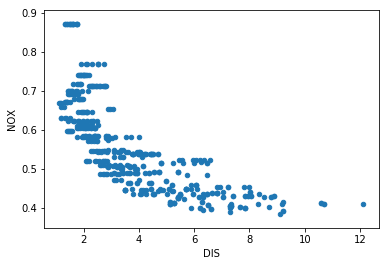

In [130]:
df.plot.scatter("DIS","NOX");

print("DIS ve NOX değişkenleri %77 oranında negatif korelasyona sahiptirler."+
      "DIS değişkeni evin Boston merkeze olan uzaklığını, NOX değişkeni ise nitrik oksit konsantrasyonunu bulunduran değişkendir."+
      "Bu duruma göre eğer ev Boston merkeze yakınsa nitrik oksit konsantrasyonu artmaktadır diyebiliriz. Evinizi biraz uzakta tutmalısınız :)")

* Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

RAD ve CHAS değişkenleri %1 oranında negatif korelasyona sahiptirler.RAD değişkeni otoyollara erişim indexini bulunduran, CHAS değişkeni ise yolun nehri sınırlayıp sınırlamadığını bulunduran değişkendir.Bu duruma göre burada herhangi bir anlam bulunmamaktadır. Bu iki değişken arasındaki ilişkiye bakmasanız da olur :)


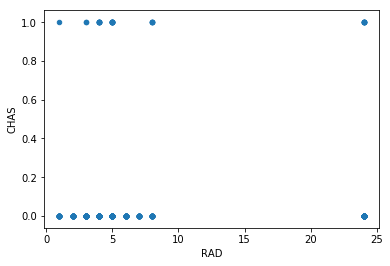

In [131]:
df.plot.scatter("RAD","CHAS");

print("RAD ve CHAS değişkenleri %1 oranında negatif korelasyona sahiptirler."+
      "RAD değişkeni otoyollara erişim indexini bulunduran, CHAS değişkeni ise yolun nehri sınırlayıp sınırlamadığını bulunduran değişkendir."+
      "Bu duruma göre burada herhangi bir anlam bulunmamaktadır. Bu iki değişken arasındaki ilişkiye bakmasanız da olur :)")

### Soru

* <b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
  sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
  heatmap için vmin ve vmax parametrelerini kullanmayın.

In [132]:
cov = df.cov()
cov

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


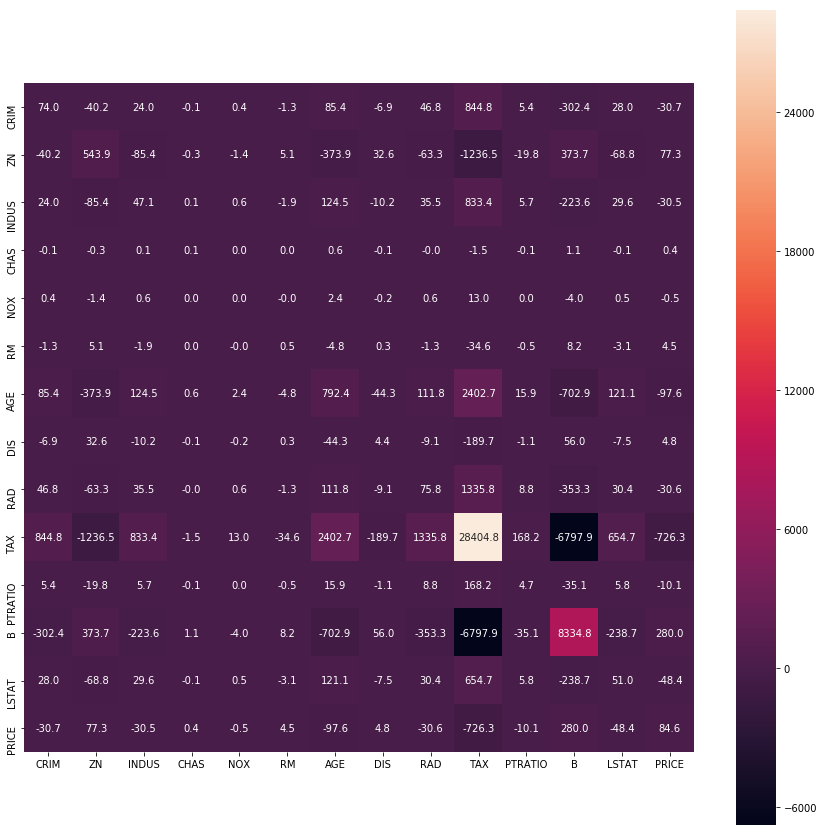

In [133]:
plt.figure(figsize=(15,15))
sns.heatmap(cov, square=True, cbar=True, annot=True, fmt='.1f');

* <b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

In [134]:
# Heatmap için python kodunu bu hücreye yazın
# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)
standart = StandardScaler()
df_standart = standart.fit_transform(df)
df_standart = pd.DataFrame(df_standart, columns=df.columns)

In [135]:
df_standart.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.001980,-0.200866,0.407389,-0.056002,0.421805,-0.219681,0.353433,-0.380422,0.626744,0.583918,0.290520,-0.385826,0.456524,-0.389074
ZN,-0.200866,1.001980,-0.534885,-0.042781,-0.517627,0.312608,-0.570665,0.665724,-0.312566,-0.315186,-0.392454,0.175868,-0.413812,0.361159
INDUS,0.407389,-0.534885,1.001980,0.063063,0.765164,-0.392451,0.646055,-0.709429,0.596308,0.722187,0.384006,-0.357683,0.604995,-0.484683
CHAS,-0.056002,-0.042781,0.063063,1.001980,0.091383,0.091432,0.086689,-0.099372,-0.007383,-0.035657,-0.121756,0.048885,-0.054036,0.175607
NOX,0.421805,-0.517627,0.765164,0.091383,1.001980,-0.302787,0.732919,-0.770753,0.612651,0.669346,0.189307,-0.380803,0.592049,-0.428167
RM,-0.219681,0.312608,-0.392451,0.091432,-0.302787,1.001980,-0.240741,0.205653,-0.210262,-0.292626,-0.356205,0.128322,-0.615024,0.696737
AGE,0.353433,-0.570665,0.646055,0.086689,0.732919,-0.240741,1.001980,-0.749361,0.456925,0.507458,0.262033,-0.274076,0.603531,-0.377701
DIS,-0.380422,0.665724,-0.709429,-0.099372,-0.770753,0.205653,-0.749361,1.001980,-0.495567,-0.535490,-0.232931,0.292089,-0.497980,0.250424
RAD,0.626744,-0.312566,0.596308,-0.007383,0.612651,-0.210262,0.456925,-0.495567,1.001980,0.912031,0.465661,-0.445293,0.489644,-0.382382
TAX,0.583918,-0.315186,0.722187,-0.035657,0.669346,-0.292626,0.507458,-0.535490,0.912031,1.001980,0.461766,-0.442683,0.545071,-0.469464


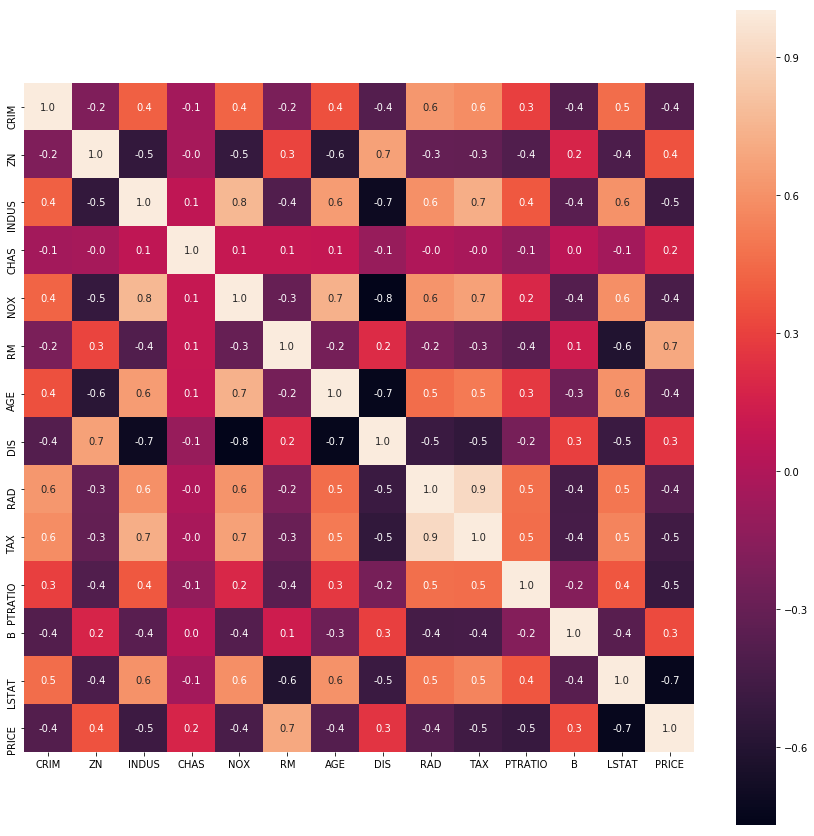

In [136]:
plt.figure(figsize=(15,15))
sns.heatmap(df_standart.cov(), square=True, cbar=True, annot=True, fmt='.1f');

**Mükemmel Oldu! :)**

*Çünkü Korelasyon, kovaryansın standartlaştırılmış halidir.*